In [1]:
print("Hello world")

Hello world


In [2]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load dataset
file_path = "train.txt"  # Change this if the path is different
df = pd.read_csv(file_path, sep=';', header=None, names=["text", "emotion"])

In [4]:
print(df.head())
print(df.info())

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
None


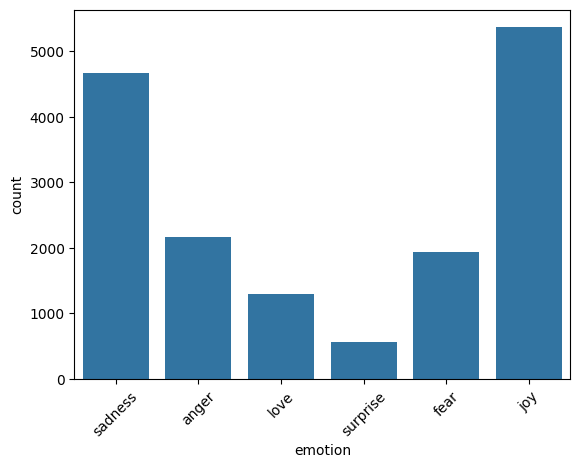

In [5]:
# Check class distribution
sns.countplot(data=df, x="emotion")
plt.xticks(rotation=45)
plt.show()

In [6]:

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.2, random_state=42)


In [7]:

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
# Train a simple Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
# Evaluate model
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.79      0.84       427
        fear       0.85      0.72      0.78       397
         joy       0.80      0.96      0.88      1021
        love       0.89      0.60      0.72       296
     sadness       0.88      0.93      0.91       946
    surprise       0.88      0.44      0.59       113

    accuracy                           0.85      3200
   macro avg       0.87      0.74      0.78      3200
weighted avg       0.85      0.85      0.84      3200



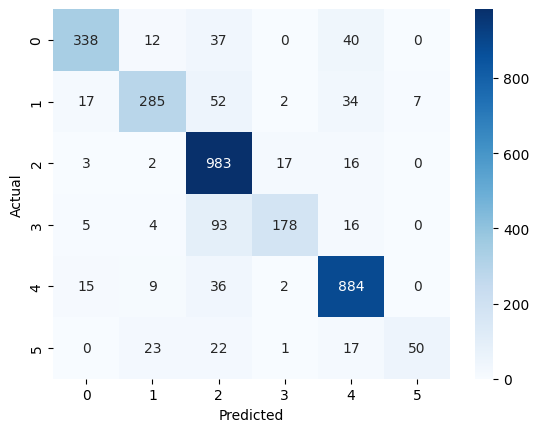

In [10]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# Test on a new sentence
sample_text = ["I am feeling very happy today!"]
sample_tfidf = vectorizer.transform(sample_text)
print("Prediction:", model.predict(sample_tfidf)[0])

Prediction: joy
